In [18]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import scipy.stats as sts

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [19]:
# Labels

In [20]:
spain_labels = pd.read_csv("../data/raw/SampleSheetSpain.csv", index_col=0)["Sample_Group"]
spain_labels = spain_labels.map(lambda x: "Helathy Blood" if not "Spain" in x else "Covid-19")
spain_labels

Sample_Name
GSM5163386            Covid-19
GSM5163387            Covid-19
GSM5163388            Covid-19
GSM5163389            Covid-19
GSM5163390            Covid-19
                     ...      
HB_Control_78    Helathy Blood
HB_Control_79    Helathy Blood
HB_Control_80    Helathy Blood
HB_Control_81    Helathy Blood
HB_Control_82    Helathy Blood
Name: Sample_Group, Length: 490, dtype: object

In [21]:
# raw CF - before correction

In [22]:
spain_cf = pd.read_csv("../data/processed/CF/Spain_before_CFC.csv", index_col=0)
spain_cf = pd.concat((spain_cf, spain_labels), axis=1)
spain_cf

,B,NK,CD4T,CD8T,Mono,Neutro,Eosino,Sample_Group
GSM5163593,0.002257,0.023829,0.195079,0.049923,0.065042,0.663872,0.0,Covid-19
GSM5163624,0.000000,0.141800,0.125534,0.022799,0.052468,0.657399,0.0,Covid-19
HB_Control_26,0.000000,0.152049,0.158047,0.002009,0.096114,0.591781,0.0,Helathy Blood
GSM5163732,0.025770,0.091979,0.228205,0.044410,0.106320,0.503316,0.0,Covid-19
HB_Control_49,0.009619,0.068933,0.074765,0.000000,0.092905,0.753778,0.0,Helathy Blood
...,...,...,...,...,...,...,...,...
GSM5163596,0.019290,0.000000,0.200085,0.000000,0.083151,0.697474,0.0,Covid-19
GSM5163503,0.000000,0.000000,0.234437,0.006541,0.100711,0.658311,0.0,Covid-19
GSM5163456,0.000000,0.171187,0.000000,0.129440,0.083872,0.615501,0.0,Covid-19
GSM5163709,0.009710,0.025270,0.107237,0.057689,0.046407,0.753687,0.0,Covid-19


In [23]:
# CF - no correction

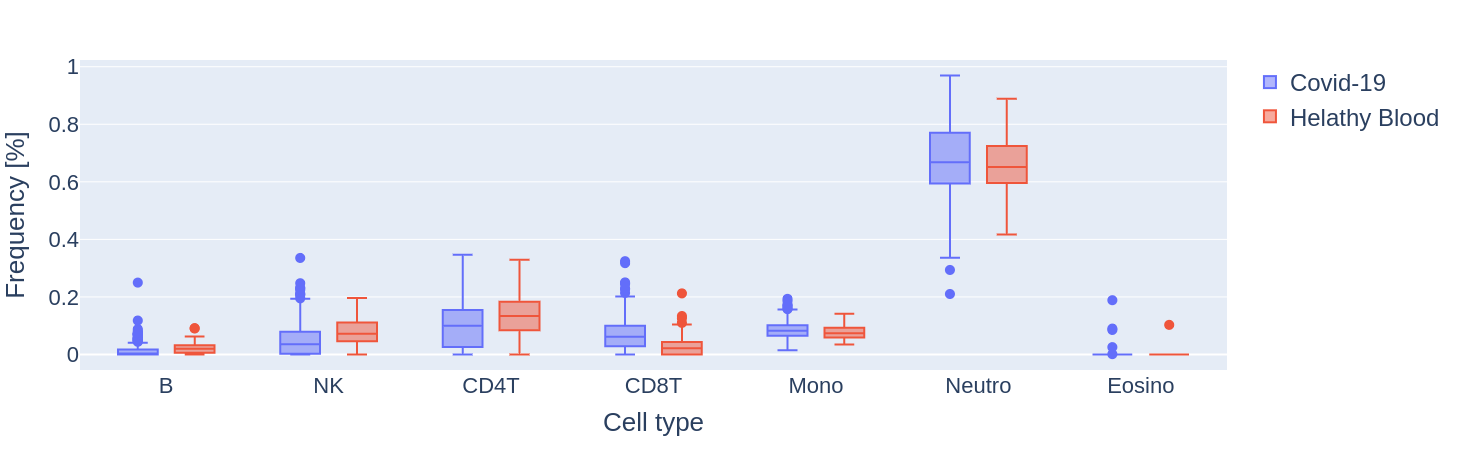

In [24]:
fig = px.box(spain_cf, color="Sample_Group", labels={"variable": "Cell type",
                                        "value": "Frequency [%]"})

fig.update_layout(legend = dict(font = dict(size=24), title=""), font=dict(size=22))
fig.update_traces(marker=dict(size=10))

fig.write_image("../Plots/CF_before_CFC.jpg")
fig.show()

In [25]:
spain_cfc = pd.read_csv("../data/processed/CF/Spain_after_CFC.csv", index_col=0)
spain_cfc = pd.concat((spain_cfc, spain_labels), axis=1)
spain_cfc

,B,NK,CD4T,CD8T,Mono,Neutro,Eosino,Sample_Group
GSM5163593,0.012376,0.052503,0.104355,0.067339,0.084163,0.679264,0,Covid-19
GSM5163624,0.002045,0.055807,0.109174,0.066488,0.082781,0.683704,0,Covid-19
HB_Control_26,0.014302,0.033594,0.099995,0.078422,0.082577,0.691111,0,Helathy Blood
GSM5163732,0.009225,0.048635,0.097126,0.066814,0.085211,0.692989,0,Covid-19
HB_Control_49,0.015740,0.054853,0.110372,0.068427,0.082830,0.667778,0,Helathy Blood
...,...,...,...,...,...,...,...,...
GSM5163596,0.010120,0.043428,0.110472,0.050021,0.087111,0.698849,0,Covid-19
GSM5163503,0.000000,0.031075,0.108463,0.070483,0.087605,0.702374,0,Covid-19
GSM5163456,0.005412,0.061830,0.077600,0.067343,0.086700,0.701116,0,Covid-19
GSM5163709,0.014437,0.057581,0.110827,0.062903,0.081840,0.672412,0,Covid-19


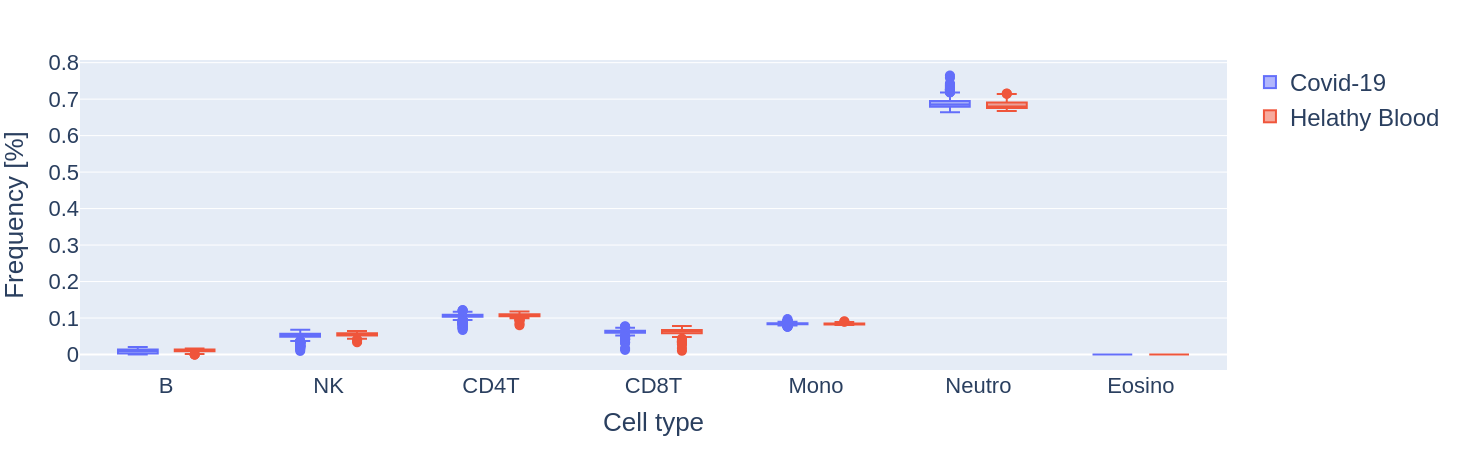

In [26]:
fig = px.box(spain_cfc, color="Sample_Group", labels={"variable": "Cell type",
                                        "value": "Frequency [%]"})


fig.update_layout(legend = dict(font = dict(size=24), title=""), font=dict(size=22))
fig.update_traces(marker=dict(size=10))

fig.write_image("../Plots/CF_after_CFC.jpg")
fig.show()

In [10]:
import random
random.seed = 44

In [11]:
mynorm_cfc = pd.read_csv("../data/processed/CorrectedMyNorms/mynorm_Spain.csv", index_col=0)
mynorm_no_cfc = pd.read_csv("../data/interim/Spain/myNorm.csv", index_col=0)

In [12]:
spain_cf # Spain cell fraction not corrected

,B,NK,CD4T,CD8T,Mono,Neutro,Eosino,Sample_Group
GSM5163593,0.002257,0.023829,0.195079,0.049923,0.065042,0.663872,0.0,Covid-19
GSM5163624,0.000000,0.141800,0.125534,0.022799,0.052468,0.657399,0.0,Covid-19
HB_Control_26,0.000000,0.152049,0.158047,0.002009,0.096114,0.591781,0.0,Helathy Blood
GSM5163732,0.025770,0.091979,0.228205,0.044410,0.106320,0.503316,0.0,Covid-19
HB_Control_49,0.009619,0.068933,0.074765,0.000000,0.092905,0.753778,0.0,Helathy Blood
...,...,...,...,...,...,...,...,...
GSM5163596,0.019290,0.000000,0.200085,0.000000,0.083151,0.697474,0.0,Covid-19
GSM5163503,0.000000,0.000000,0.234437,0.006541,0.100711,0.658311,0.0,Covid-19
GSM5163456,0.000000,0.171187,0.000000,0.129440,0.083872,0.615501,0.0,Covid-19
GSM5163709,0.009710,0.025270,0.107237,0.057689,0.046407,0.753687,0.0,Covid-19


In [13]:
spain_cfc # Spain cell fraction corrected

,B,NK,CD4T,CD8T,Mono,Neutro,Eosino,Sample_Group
GSM5163593,0.012376,0.052503,0.104355,0.067339,0.084163,0.679264,0,Covid-19
GSM5163624,0.002045,0.055807,0.109174,0.066488,0.082781,0.683704,0,Covid-19
HB_Control_26,0.014302,0.033594,0.099995,0.078422,0.082577,0.691111,0,Helathy Blood
GSM5163732,0.009225,0.048635,0.097126,0.066814,0.085211,0.692989,0,Covid-19
HB_Control_49,0.015740,0.054853,0.110372,0.068427,0.082830,0.667778,0,Helathy Blood
...,...,...,...,...,...,...,...,...
GSM5163596,0.010120,0.043428,0.110472,0.050021,0.087111,0.698849,0,Covid-19
GSM5163503,0.000000,0.031075,0.108463,0.070483,0.087605,0.702374,0,Covid-19
GSM5163456,0.005412,0.061830,0.077600,0.067343,0.086700,0.701116,0,Covid-19
GSM5163709,0.014437,0.057581,0.110827,0.062903,0.081840,0.672412,0,Covid-19


In [14]:
spain_cf

,B,NK,CD4T,CD8T,Mono,Neutro,Eosino,Sample_Group
GSM5163593,0.002257,0.023829,0.195079,0.049923,0.065042,0.663872,0.0,Covid-19
GSM5163624,0.000000,0.141800,0.125534,0.022799,0.052468,0.657399,0.0,Covid-19
HB_Control_26,0.000000,0.152049,0.158047,0.002009,0.096114,0.591781,0.0,Helathy Blood
GSM5163732,0.025770,0.091979,0.228205,0.044410,0.106320,0.503316,0.0,Covid-19
HB_Control_49,0.009619,0.068933,0.074765,0.000000,0.092905,0.753778,0.0,Helathy Blood
...,...,...,...,...,...,...,...,...
GSM5163596,0.019290,0.000000,0.200085,0.000000,0.083151,0.697474,0.0,Covid-19
GSM5163503,0.000000,0.000000,0.234437,0.006541,0.100711,0.658311,0.0,Covid-19
GSM5163456,0.000000,0.171187,0.000000,0.129440,0.083872,0.615501,0.0,Covid-19
GSM5163709,0.009710,0.025270,0.107237,0.057689,0.046407,0.753687,0.0,Covid-19


In [15]:
def calculate_adj_r2(r2, n, p) -> float:
    param = 1 - (1 - r2) * ((n-1) / (n - p - 1))
    
    if param < 0:
        return 0
    else:
        return param
    
    
def model(X, y) -> float:
    model = LinearRegression()
    model.fit(X, y)
    r2 =  r2_score(y, model.predict(X))
    adj_r2 = calculate_adj_r2(r2=r2, n=len(y), p=X.shape[1])
    
    return adj_r2
    
results = []
for cpg in tqdm(random.sample(set(mynorm_cfc.index), 10000)):
    
    cf = spain_cf.drop("Sample_Group", axis=1) # Estimated WBC fractions
    
    met_level_corrected = mynorm_cfc.loc[cpg, :]   
    df_cfc = pd.concat((cf, met_level_corrected), axis=1).astype(float)   

    X_cfc = df_cfc.drop(cpg, axis=1).values # WBC fractions - regressors
    y_cfc = df_cfc[cpg].values.reshape(-1, 1) # Methylation levels
    
    r2_cfc = model(X_cfc, y_cfc)
    
    met_level_no_cfc = mynorm_no_cfc.loc[cpg, :]
    df_no_cfc = pd.concat((cf, met_level_no_cfc), axis=1)
    
    X_no_cfc = df_no_cfc.drop(cpg, axis=1).values
    y_no_cfc = df_no_cfc[cpg].values.reshape(-1, 1)
    
    r2_no_cfc = model(X_no_cfc, y_no_cfc)
    results.append({"Marker": cpg, "No CFC R2": r2_no_cfc, "CFC R2": r2_cfc})

100%|██████████| 10000/10000 [00:34<00:00, 285.87it/s]


In [16]:
results = pd.DataFrame(results).set_index("Marker")
results

,No CFC R2,CFC R2
Marker,,
cg12439439,0.279731,0.0
cg15182994,0.043171,0.0
cg19268453,0.782280,0.0
cg26886614,0.129762,0.0
cg06972010,0.109721,0.0
...,...,...
cg04530666,0.072928,0.0
cg06353614,0.047313,0.0
cg03450046,0.032458,0.0


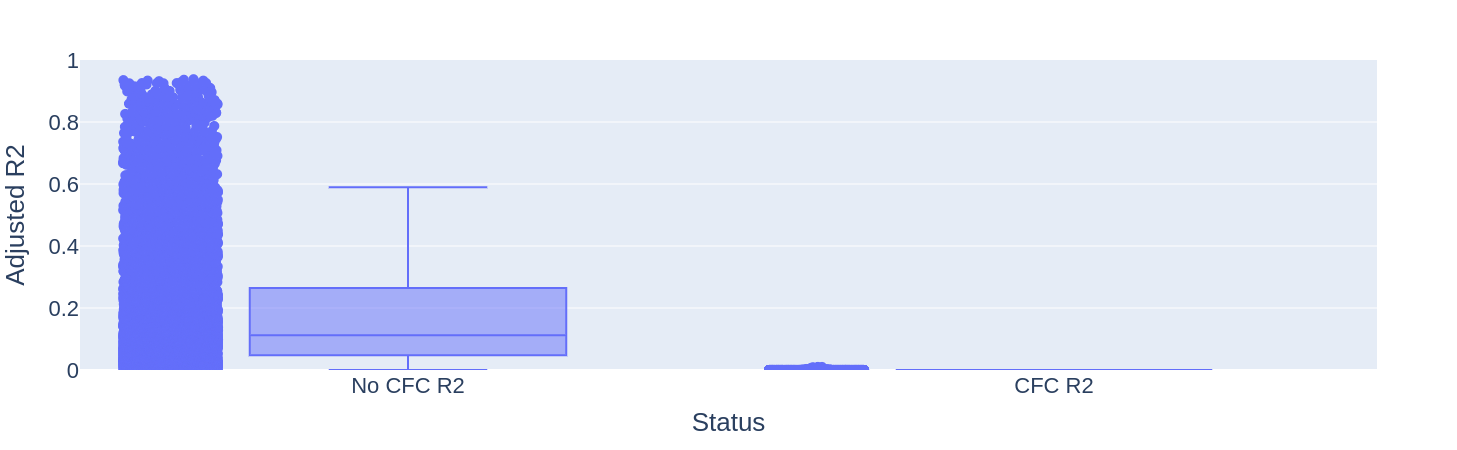

In [17]:
fig = px.box(results, labels={"variable": "Status",
                                           "value": "Adjusted R2"}, points='all')


fig.update_layout(legend = dict(font = dict(size=24), title=""), font=dict(size=22))
fig.update_traces(marker=dict(size=10))



fig.update_yaxes(range=[0, 1])
fig.write_image("../Plots/AdjR2.jpg")
fig.show()